<a href="https://colab.research.google.com/github/Spin-Chemistry-Labs/radicalpy/blob/187-google-colab-tutorials/examples/tutorials/01_what_are_radical_pairs_and_their_magnetic_interactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Tutorial 1 - What are radical pairs and their magnetic interactions



This tutorial aims to introduce key concepts of [electrons](https://en.wikipedia.org/wiki/Electron), [spins](https://en.wikipedia.org/wiki/Spin_(physics)), [magnetic moments](https://en.wikipedia.org/wiki/Magnetic_moment), the [Zeeman effect](https://en.wikipedia.org/wiki/Zeeman_effect), [hyperfine interactions](https://en.wikipedia.org/wiki/Electron_paramagnetic_resonance), [*J*-coupling](https://en.wikipedia.org/wiki/J-coupling), and [dipolar coupling](https://en.wikipedia.org/wiki/Magnetic_dipole%E2%80%93dipole_interaction). These key concepts are presented in a hybrid style incorporating text and coding ([Python](https://www.python.org/)) in the same document, hoping to provide a more interactive learning approach.

In [1]:
# !pip install radicalpy
# !pip install pint

In [2]:
import ipywidgets as wdg
import matplotlib.pyplot as plt
import numpy as np
import pint
import radicalpy as rp
from radicalpy.shared import constants as C

---

### Spin quantum numbers and spin multiplicity

Electrons possess a [spin quantum number](https://en.wikipedia.org/wiki/Spin_quantum_number), $S$ = $\frac{1}{2}$. [Spin multiplicity](https://en.wikipedia.org/wiki/Multiplicity_(chemistry)) = $2 S + 1$, and tell us the number of possible spin orientations, indicating the amount of [unpaired spin](https://en.wikipedia.org/wiki/Unpaired_electron). The following table displays spin multiplicity for various $S$ values,

| $S$ | 2S+1 | Spin state |
| :-: | :-: | :-: |
| 0 | 1 | Singlet |
| 1/2 | 2 | Doublet |
| 1 | 3 | Triplet |
| 3/2 | 4 | Quartet |
| 2 | 5 | Quintet |

Electrons are doublets and therefore have two [magnetic quantum numbers](https://en.wikipedia.org/wiki/Magnetic_quantum_number) (two spin states), $m_s = \color{magenta}{+\frac{1}{2}}$ and $m_s = \color{red}{-\frac{1}{2}}$. These two magnetic quantum numbers are commonly referred to in various ways,

| $m_s$ = $\color{magenta}{+\frac{1}{2}}$ | $m_s$ = $\color{red}{-\frac{1}{2}}$ |
| :-: | :-: |
| <font color='magenta'>spin up</font> | <font color='red'>spin down</font> |
| $\color{magenta}{\alpha}$ | $\color{red}{\beta}$ |
| $\color{magenta}{\upharpoonleft}$ | $\color{red}{\downharpoonright}$ |

Now let's have a look at calculating spin multiplicity (`SM`).

In [3]:
slider = wdg.interact(lambda S:2*S+1, S = wdg.FloatSlider(min = 0, step = 0.5, max = 5, value = 0, description = 'S'))
wdg.Label(value = "Spin Multiplicity")

interactive(children=(FloatSlider(value=0.0, description='S', max=5.0, step=0.5), Output()), _dom_classes=('wi…

Label(value='Spin Multiplicity')

---

### Zeeman energy

You can change the value of `S` to give you the number of spin states (`SM`) for your [particle](https://en.wikipedia.org/wiki/Particle_physics) of choice, for example, an electron or [proton](https://en.wikipedia.org/wiki/Proton) (`S = 0.5`), a [nitrogen atom](https://en.wikipedia.org/wiki/Nitrogen) (`S = 1`), or a radical pair (`S = 0 or 1`).

A particle with both spin and charge can generate a [magnetic field](https://en.wikipedia.org/wiki/Magnetic_field), which is called the *magnetic moment*. For electrons, this is called the *magnetic dipole moment* ($\mathbf{\mu}$) and is proportional to its spin [angular momentum](https://en.wikipedia.org/wiki/Angular_momentum) ($\mathbf{s}$),

$$
\mathbf{\mu} = \gamma \mathbf{s}
$$

where $\gamma$ is the proportionality constant. When $\mu$ is parallel to $\mathbf{s}$, $\gamma > 0$, and when $\mu$ is antiparallel to $\mathbf{s}$, $\gamma < 0$.

| Particle | $\gamma (10^{7} rad T^{-1} s^{-1}$) |
| :-: | :-: |
| 1H | 26.75 |
| Electron | -17,609 |

Is it clear that the electron is ~1000 times a stronger magnet than hydrogen. The electron's magnetic moment aligns itself either parallel ($m_s = \color{magenta}{+\frac{1}{2}}$) or anitparallel ($m_s = \color{red}{-\frac{1}{2}}$) to an external magentic field ($B{_0}$) with energies corresponding to the Zeeman effect,

$$
E = m_s g_e \mu_B B_0
$$

Let's calculate the [Zeeman energy](https://en.wikipedia.org/wiki/Zeeman_energy) (`E`) for a free electron. The `pint` package allows one to define, operate and manipulate physical quantities with the product of a numerical value and a unit of measurement. In the following example, the [Bohr magneton](https://en.wikipedia.org/wiki/Bohr_magneton) ($\mu_B$) = $9.27400949 \times 10^{-24} J T^{-1}$ has been given the name `muB`, its value `9.27400949e-24`, and its units `* u('J / T')`. Conversion from *J* to *yJ* is achieved with `.to('yj')`. Using the `pint` package removes the need of keeping track of units when multiple calculations are required. 

In [4]:
u = pint.UnitRegistry()
u.formatter.default_format = '.2f' # Rounding numbers to 2 significant figures

# Calculate the Zeeman energy
ms = 0.5 # magnetic quantum number
ge = C.g_e  
muB = 9.27400949e-24 * u('J / T') # Bohr magneton in J/T
B0 = 1 * u.T # External magnetic field in T
E = ms * ge * muB * B0 # Zeeman energy in J
print('Zeeman energy =', E.to('yJ')) # y = yocto = 10^-24

Zeeman energy = 9.28 yoctojoule


The code below allows you to change the value of `E` with a slider, giving the calculated Zeeman energy.

In [5]:
muB = C.mu_B  # Bohr magneton in J/T
B0 = 1  # External magnetic field in T

slider = wdg.interact(lambda B0:(ms*ge*muB*B0)*1e24, B0 = wdg.FloatSlider(min = 0, step = 0.00001, max = 10, value = 0, description = 'B0 (T)', readout_format = '.3f'))
wdg.Label(value = "Zeeman energy (yJ)")

interactive(children=(FloatSlider(value=0.0, description='B0 (T)', max=10.0, readout_format='.3f', step=1e-05)…

Label(value='Zeeman energy (yJ)')

---

### Energy level splitting

The Bohr magneton, $\mu_B$, is a natural unit for expressing the magnetic moment of an electron caused by either its spin or orbital angular momentum,

$$
\mu_B = \frac{e \hbar}{2 m_e}
$$

$e$ is the [elementary charge](https://en.wikipedia.org/wiki/Elementary_charge) in $C$, *$\hbar$* ("h-bar") is the [reduced Planck's constant](https://en.wikipedia.org/wiki/Planck_constant) with units of $J T^{-1}$, and $m_e$ is the [electron rest mass](https://en.wikipedia.org/wiki/Electron_rest_mass) in $kg$. Electron spin angular momentum is [quantised](https://en.wikipedia.org/wiki/Quantization_(physics)) in units of $\hbar$. $g_e$ is a dimensionless quantity and is the electron's so-called [$g$-factor](https://en.wikipedia.org/wiki/G-factor_(physics)), where $g_e = 2.0023$ for a free electron. An external magnetic field will exert torque on a magnetic dipole, removing [degeneracies](https://en.wikipedia.org/wiki/Degenerate_energy_levels) of the electron spin states. The magnetic potential energy ($E$) is obtained from the [scalar product](https://en.wikipedia.org/wiki/Dot_product) of the magnetic field ($B_0$) vector and the magnetic moment ($\mu$) vector, in a strong magnetic field, where quantisation is along the field direction. Therefore, the separation between the lower and upper states for unpaired free electrons is given by,

$$
\Delta E = g_e \mu_B B_0
$$

As $g_e$ and $\mu_B$ are constants, the [splitting](https://en.wikipedia.org/wiki/Energy_level_splitting) of the energy levels is proportional to the external magnetic field strength, $B_0$. 

In [6]:
# Calculate the energy separation between lower and upper states
muB = 9.27400949e-24 * u('J / T') # Bohr magneton in J/T
B0 = 1 * u.T # External magnetic field in T
E = ge * muB * B0 # Zeeman energy in J
print('Splitting energy =', E.to('yJ')) # y = yocto = 10^-24

Splitting energy = 18.57 yoctojoule


The code below allows you to change the value of `E` with a slider, giving the calculated splitting energy.

In [7]:
muB = C.mu_B # Bohr magneton in J/T
B0 = 1 # External magnetic field in T

slider = wdg.interact(lambda B0:(ge*muB*B0)*1e24, B0 = wdg.FloatSlider(min = 0, step = 0.00001, max = 10, value = 0, description = 'B0 (T)', readout_format = '.3f'))
wdg.Label(value = "Splitting energy (yJ)")

interactive(children=(FloatSlider(value=0.0, description='B0 (T)', max=10.0, readout_format='.3f', step=1e-05)…

Label(value='Splitting energy (yJ)')

---

### Resonance condition

An unpaired electron's spin can change by either absorbing or emitting a [photon of energy](https://en.wikipedia.org/wiki/Photon_energy), $h \nu$, where the *resonance condition*, $h \nu = \Delta E$ is fulfilled. Providing the elementary equation of [electron paramagnetic resonance (EPR) (electron spin resonance (ESR))](https://en.wikipedia.org/wiki/Electron_paramagnetic_resonance),

$$
h \nu = g_e \mu_B B_0
$$

Where we can convert $h \nu$ to [wavelength](https://en.wikipedia.org/wiki/Wavelength), to find the region of the [electromagnetic spectrum](https://en.wikipedia.org/wiki/Electromagnetic_spectrum) which the [radical (unpaired electron)](https://en.wikipedia.org/wiki/Radical_(chemistry)) absorbs or emits,

$$
\lambda = c / \nu
$$

Where $c$ is the [speed of light](https://en.wikipedia.org/wiki/Speed_of_light) and $\lambda$ is wavelength, which can be calculated as follows,

In [8]:
# Constants and variables
muB = 9.27400949e-24 * u('J / T') # Bohr magneton for an electron in J/T
B0 = 0.33 * u.T # External magnetic field in T
h = 6.62607015e-34 * u('J s') # Planck's constant in Js

# Convert to wavelength
v = (ge * muB * B0) / h # frequency in Hz
c = 299792458 * u('m/s')  # speed of light in m/s
wl = c / v # wavelength in m 
print('Frequency =', v.to('GHz'))
print('Wavelength =', wl.to('mm'))

Frequency = 9.25 gigahertz
Wavelength = 32.42 millimeter


The frequency of 9.25 GHz corresponds to [X-band EPR (ESR)](https://en.wikipedia.org/wiki/Electron_paramagnetic_resonance) and we see that electrons absorb or emit electromagnetic radiation in the microwave region. The code below allows you to change the value `B0` with a slider to calculate `v` and `wl`. Do you know the different EPR (ESR) wavebands?

In [9]:
muB = C.mu_B # Bohr magneton for an electron in J/T
B0 = 0.33 # External magnetic field in T
h = C.h # Planck's constant in Js
c = C.c  # speed of light in m/s

slider = wdg.interact(lambda B0:((ge*muB*B0)/h)*1e-9, B0 = wdg.FloatSlider(min = 0.03, step = 0.01, max = 12.8, value = 0, description = 'B0 (T)', readout_format = '.3f'))
wdg.Label(value = "Frequency (GHz)")

interactive(children=(FloatSlider(value=0.03, description='B0 (T)', max=12.8, min=0.03, readout_format='.3f', …

Label(value='Frequency (GHz)')

In [10]:
slider = wdg.interact(lambda B0:(c/((ge*muB*B0)/h))*1e3, B0 = wdg.FloatSlider(min = 0.03, step = 0.01, max = 12.8, value = 0, description = 'B0 (T)', readout_format = '.3f'))
wdg.Label(value = "Wavelength (mm)")

interactive(children=(FloatSlider(value=0.03, description='B0 (T)', max=12.8, min=0.03, readout_format='.3f', …

Label(value='Wavelength (mm)')

---

### Zeeman interaction - for a single electron

The Zeeman spin Hamiltonian describes the interaction between electron spin and an external magnetic field, which is given by,

$$
\hat{H}_{Zee} = \frac{g \mu_B B_0 \hat{\sigma}_z}{\hbar}
$$

We have used *RadicalPy* to create an electron from the isotope library (`.fromisotopes`). We then create a sim object using the `HilbertSimulation` class, from which we can create the Zeeman Hamiltonian (`sim.zeeman_hamiltonian`).

The code below changes the value of $B_0$ from 0 to 1 T in 100 steps. This is done with a *for loop*, which is applied with the function `for i,B0 in enumerate(Bs):`, where `B0` is the variable in which you would like to sweep, in our case the external magnetic field. The [eigenvalues](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) of the Hermitian matrix represent the energies of the electron for the $m_s = \pm\frac{1}{2}$ spin states. The eigenvalues are obtained with the function `np.linalg.eigh()`, where we insert the Zeeman Hamiltonian `(H)` inside the parentheses. We can then plot the magnetic field values (`Bs`) vs eigenvalues (`E`) to visualise the Zeeman interaction for a free electron. Where [`matplotlib`](https://matplotlib.org/) is a library which allows one to plot data in Python.

In [11]:
electron = rp.simulation.Molecule.fromisotopes(isotopes=["E"], hfcs=[], name="electron") 
sim = rp.simulation.HilbertSimulation(molecules=[electron], basis="Zeeman")
sim

Number of electrons: 1
Number of nuclei: 0
Number of particles: 1
Multiplicities: [2]
Magnetogyric ratios (mT): [-176085963.023]
Nuclei: []
Couplings: []
HFCs (mT): []

In [12]:
def electron_zeeman(Bmax):
    Bs = np.linspace(0, Bmax, 100)
    E = np.zeros([len(Bs), 2], dtype=np.complex128)
    
    for i,B0 in enumerate(Bs):
        H = sim.zeeman_hamiltonian(B0)
        eigval = np.linalg.eigh(H)
        E[i] = eigval[0]  # 0 = eigenvalues, 1 = eigenvectors
        
    fig = plt.figure(1)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.plot(Bs, np.real(E)[:,1], color="magenta", linewidth=4)
    ax.plot(Bs, np.real(E)[:,0], color="red", linewidth=4)
    ax.set_xlabel("B$_0$ / mT", size=14)
    ax.set_ylabel("Spin state energy", size=14)
    plt.tick_params(labelsize=14)
    plt.ylim(-10e9, 10e9)



@wdg.interact(Bmax = wdg.SelectionSlider(options=[("%g"%i,i) for i in np.linspace(0, 50, 101)]))
def update(Bmax = 0):electron_zeeman(Bmax)

interactive(children=(SelectionSlider(description='Bmax', options=(('0', np.float64(0.0)), ('0.5', np.float64(…

Where $m_s = \color{magenta}{+\frac{1}{2}}$ or $\color{magenta}{|\alpha⟩}$ has a slope of $+\frac{1}{2}g \mu_B$ and is destabilised by the magnetic field, and $m_s = \color{red}{-\frac{1}{2}}$ or $\color{red}{|\beta⟩}$ has a slope of $-\frac{1}{2}g \mu_B$ and is stabilised by the magnetic field.

---

### Radical pairs

No we have some understanding of how electrons are magnetic, we can now start to think about two electrons that are paired, a radical pair.
Radical pairs are two paired electrons (as the name suggests). Two electrons can be paired in the following ways,

$$
\begin{aligned}
\color{green}{S_A} &= \frac{1}{2}, \,\color{blue}{S_B} = \frac{1}{2} \\
S_{tot} &= \color{green}{S_A} - \color{blue}{S_B} = \color{orange}{0} \\
&= \color{green}{S_A} + \color{blue}{S_B} = \color{purple}{1}
\end{aligned}
$$

When $S_{tot} = \color{orange}{0}$, the two electrons are antiparallel (**one** <font color='magenta'>spin up</font> and **one** <font color='red'>spin down</font>), therefore spin allowed and in a <font color='orange'>singlet state</font> ([link](https://en.wikipedia.org/wiki/Singlet_state)). For $S_{tot} = \color{purple}{1}$, the two electrons are parallel (**both** are either <font color='magenta'>spin up</font> or <font color='red'>spin down</font>) and are now in a <font color='purple'>triplet state</font> ([link](https://en.wikipedia.org/wiki/Triplet_state)).

I will not go into spin operators, product operators, Pauli matrices, etc, which will come later, instead look at how various magnetic interactions influence the energy levels of a radical pair. In *RadicalPy*, we can construct the radical pair easily by just creating two molecules, where above we only created one molecule.

In [13]:
electron1 = rp.simulation.Molecule.fromisotopes(isotopes=["E"], hfcs=[], name="electron1") 
electron2 = rp.simulation.Molecule.fromisotopes(isotopes=["E"], hfcs=[], name="electron2") 
radical_pair = rp.simulation.HilbertSimulation(molecules=[electron1, electron2], basis="Zeeman")
radical_pair

Number of electrons: 2
Number of nuclei: 0
Number of particles: 2
Multiplicities: [2, 2]
Magnetogyric ratios (mT): [-176085963.023, -176085963.023]
Nuclei: []
Couplings: []
HFCs (mT): []

---

### Zeeman interaction - for a radical pair

The Zeeman interaction for a radical pair is modified to accommodate two electrons, which is given by,

$$
\hat{H}_{Zee} = \frac{\mu_B B_0}{\hbar}(g_A\hat{S}_{Az}+g_B\hat{S}_{Bz})
$$

Where $g_A$ and $g_B$ are the $g$-values for radical A and radical B, respectively. The code below solves $\hat{H}_{Zee}$, plotting the eigenvalues of the four states of the radical pair as a function of $B_0$. You may notice that there are only three lines in the plot below. We must include other magnetic interactions to see all four lines.

In [14]:
def radicalpair_zeeman(Bmax):
    Bs = np.linspace(0, Bmax, 100)
    shape = len(radical_pair.zeeman_hamiltonian(0))
    E = np.zeros([len(Bs), shape], dtype=np.complex128)
    
    for i,B0 in enumerate(Bs):
        H = radical_pair.zeeman_hamiltonian(B0)
        eigval = np.linalg.eigh(H)
        E[i] = eigval[0]  # 0 = eigenvalues, 1 = eigenvectors
        
    fig = plt.figure(1)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.plot(Bs, np.real(E)[:,3], color="purple", linewidth=4)
    ax.plot(Bs, np.real(E)[:,2], color="purple", linewidth=4)
    ax.plot(Bs, np.real(E)[:,1], color="orange", linewidth=4)
    ax.plot(Bs, np.real(E)[:,0], color="purple", linewidth=4)
    ax.set_xlabel("B$_0$ / mT", size=14)
    ax.set_ylabel("Spin state energy", size=14)
    plt.tick_params(labelsize=14)
    plt.ylim(-10e9, 10e9)



@wdg.interact(Bmax = wdg.SelectionSlider(options=[("%g"%i,i) for i in np.linspace(0.0, 50.0, 101)]))
def update(Bmax = 0.0):radicalpair_zeeman(Bmax)

interactive(children=(SelectionSlider(description='Bmax', options=(('0', np.float64(0.0)), ('0.5', np.float64(…

---

### Hyperfine interaction

The spin of electrons in atoms and molecules can also interact with the overall spin of nuclei = hyperfine interaction,

$$
\hat{H}_{hyper} = \mathbf{\hat{i}} \bullet \mathbf{a} \bullet \mathbf{\hat{s}}
$$

Where $\mathbf{a}$ is the hyperfine interaction tensor, $\mathbf{\hat{i}}$ is the nuclear spin angular momentum vector, and $\mathbf{\hat{s}}$ is the electron spin operator. 

The hyperfine interaction has two components,
1. [Dipolar interaction](https://en.wikipedia.org/wiki/Magnetic_dipole%E2%80%93dipole_interaction)
    - Interaction of the magnetic field associated with the nuclear spin with the magnetic moment of the electron and vice versa (like the attraction of two bar magnets).
        - Depends on the relative orientation of the electronic and nuclear dipoles = anisotropic.
        - Orientational averaging of the dipolar interaction equals zero for fast tumbling molecules (*e.g.*, in solution).
2. [Fermi contact interaction](https://en.wikipedia.org/wiki/Fermi_contact_interaction)
    - This is the case only for electrons with some [s character](https://en.wikipedia.org/wiki/Atomic_orbital) (as they are the only orbitals with a non-zero probability of existing in the nucleus.
    - The Fermi contact interaction is isotropic.

This tutorial will only discuss the Fermi contact interaction of hyperfine coupling. The dipolar interaction will be discussed in a later tutorial.

The isotropic hyperfine Hamiltonian is given by,

$$
\hat{H}_{hyper} = a \,\mathbf{\hat{i}} \bullet \mathbf{\hat{s}} = a\,\big(\hat{i}_x \hat{s}_x + \hat{i}_y \hat{s}_y + \hat{i}_z \hat{s}_z\big)
$$

$a$ is the average hyperfine interaction tensor. The total spin Hamiltonian for a radical pair and a nucleus with an external magnetic field is given by, 

$$
\begin{aligned}
\hat{H}_{total} &= \color{orange}{\hat{H}_{Zee,\,e}} + \color{green}{\hat{H}_{Zee,\,n}} + \color{blue}{\hat{H}_{hyper}} \\
&= \color{orange}{\frac{g_e + \mu_B}{\hbar}B_0 \hat{s}_z} + \color{green}{\frac{g_n + \mu_N}{\hbar}B_0 \hat{i}_z} + \color{blue}{a\,\big(\hat{i}_x \hat{s}_x + \hat{i}_y \hat{s}_y + \hat{i}_z \hat{s}_z\big)}
\end{aligned}
$$

Which represent the interaction between,
* <font color='orange'>Zeeman interaction between the electron and the external magnetic field.</font>
* <font color='green'>Zeeman interaction between the nucleus and the external magnetic field.</font>
* <font color='blue'>Hyperfine interaction between the electron and nucleus.</font>

In [15]:
def radicalpair_zeeman_hyperfine(Bmax, hfc1, hfc2):
    electron1 = rp.simulation.Molecule.fromisotopes(isotopes=["E"], hfcs=[hfc1], name="electron1") 
    electron2 = rp.simulation.Molecule.fromisotopes(isotopes=["E"], hfcs=[hfc2], name="electron2") 
    radical_pair = rp.simulation.HilbertSimulation(molecules=[electron1, electron2], basis="Zeeman")

    Bs = np.linspace(0, Bmax, 100)
    shape = len(radical_pair.zeeman_hamiltonian(0))
    E = np.zeros([len(Bs), shape], dtype=np.complex128)
    
    for i,B0 in enumerate(Bs):
        H = radical_pair.zeeman_hamiltonian(B0) + radical_pair.hyperfine_hamiltonian()
        eigval = np.linalg.eigh(H)
        E[i] = eigval[0]  # 0 = eigenvalues, 1 = eigenvectors
        
    fig = plt.figure(1)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.plot(Bs, np.real(E), linewidth=4)
    ax.set_xlabel("B$_0$ / mT", size=14)
    ax.set_ylabel("Spin state energy", size=14)
    plt.tick_params(labelsize=14)
    plt.ylim(-4e9, 4e9)

@wdg.interact(Bmax = wdg.SelectionSlider(options=[("%g"%i,i) for i in np.linspace(0.0, 10, 100)]),
              hfc1 = wdg.FloatSlider(min=0, max=2.0, step=0.1, value=0.0),
              hfc2 = wdg.FloatSlider(min=0, max=2.0, step=0.1, value=0.0))
def update(Bmax = 0, hfc1 = 0.0, hfc2 = 0.0):radicalpair_zeeman_hyperfine(Bmax, hfc1, hfc2)

interactive(children=(SelectionSlider(description='Bmax', options=(('0', np.float64(0.0)), ('0.10101', np.floa…

---

### Electron-electron interactions

There are two ways in which two electronic spins in radical pairs (RPs) can interact:
* **J-coupling (exchange interaction)**
    * Direct interaction of the wavefunctions of two electrons.
    * It arises due to the [Pauli exclusion principle](https://en.wikipedia.org/wiki/Pauli_exclusion_principle), which dictates the allowed spatial wavefunctions of different electronic states.
    * The strength of J-coupling decreases approimately exponetially with distance.
* **Dipolar interaction**
    * The strength of the interaction scales approximately as one over the cube of the distance between the pair of electrons ($D \propto r^{-3}$).
    * The dipolar interaction between electrons averages out in solution.

Therefore, electron-electron exchange ($J$) and dipolar ($D$) couplings both depend on the distance ($r$) between the centres of the electron spin density of the two radicals.
In the absence of other spin interactions, $J(r)$ and $D(r)$ remove the energy ($E$) degeneracy of the <font color='orange'>singlet</font> and <font color='purple'>triplet</font> states:

$$
E(S) = +J(r), \\
E(T_m) = -J(r) + D(r) \biggl(m^2 - \frac{2}{3}\biggr),
$$

where $m$ is the [magnetic quantum number](https://en.wikipedia.org/wiki/Magnetic_quantum_number) of the <font color='purple'>triplet</font>, *i.e.*, -1, 0, +1. These interactions incumber efficient <font color='orange'>singlet</font>-<font color='purple'>triplet</font> interconversion (ST-mixing). Therefore, damage the magnetic field sensitivity of the radical pair.

---

### *J*-coupling (exchange interaction)

In spin chemistry, the exchange interaction is normally assumed to decrease exponentially with RP separation. It is also independent of the orientation of the radicals and solvent. In RP reactions, *J*-coupling acts to prevent ST-mixing. Therefore, when the radicals are close enough the exchange interaction dominates the RP spin Hamiltonian and subsequently there are no magnetic field effects. The figure below displays the influence of $J$ on radical separation(*r*), where the <font color='purple'>triplet</font> states are split due to the Zeeman interaction.

---

#### Solution-based radical pairs

Now let's look at how $J$ is approximated in solution-based radical pairs,

$$
J(r) \approx J_0 e^{-r/r_J},
$$

where $J_0 = 1.7 \times 10^{17}$ rad s$^{-1}$ and $r_J = 49$ pm ([McLauchlan and Steiner, *Mol Phys*, 2006](https://www.tandfonline.com/doi/abs/10.1080/00268979100101181)). We can plot this $J$ dependence as follows:

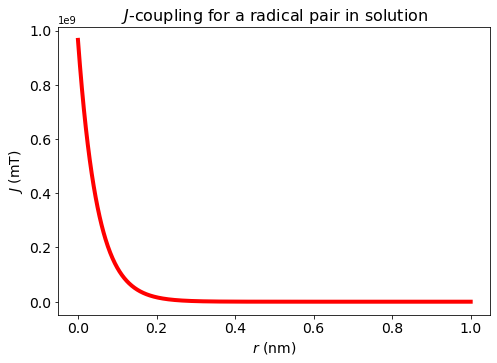

In [16]:
r = np.linspace(0,1e-9,1000)
J = rp.estimations.exchange_interaction_in_solution(r, beta=0.049e-9, J0rad=1.7e17)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(r*1e9, -J, color='red', linewidth=4)
ax.set_title("$J$-coupling for a radical pair in solution", size=16)
ax.set_xlabel('$r$ (nm)', size=14)
ax.set_ylabel('$J$ (mT)', size=14)
plt.tick_params(labelsize=14)

---

#### Protein-based radical pairs

Another approximation of $J$ is given for protein-based radical pairs and is given by,

$$
J(r) \approx J_0 e^{-\beta r},
$$

where $J_0 = 9.7 \times 10^{9}$ mT and $\beta = 1.4$ Å$^{-1}$ ([Moser *et al.*, *Nature*, 1992](https://www.nature.com/articles/355796a0)). We can plot this $J$ dependence as follows:

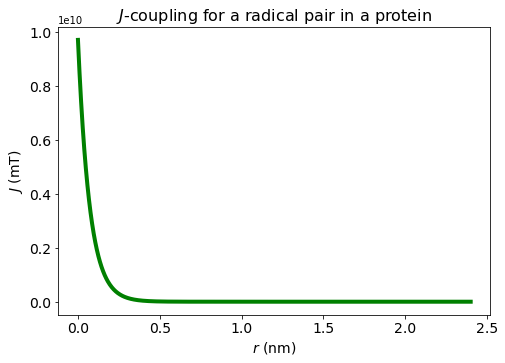

In [17]:
r = np.linspace(0,2.4e-9,1000)
J_protein = rp.estimations.exchange_interaction_in_protein(r)

# Plot the result
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(r*1e9, J_protein, color='green', linewidth=4)
ax.set_title("$J$-coupling for a radical pair in a protein", size=16)
ax.set_xlabel('$r$ (nm)', size=14)
ax.set_ylabel('$J$ (mT)', size=14)
plt.tick_params(labelsize=14)
#plt.savefig("Figures/JcouplingRPprotein.png", bbox_inches='tight', dpi=300)
plt.show()

---

#### *J*-coupling Hamiltonian

To describe the spin evolution of a radical pair where the radical approach closely enough for inter-radical electron correlation and bonding effects to set in, we use the following spin Hamiltonian,

$$
\hat{H}_J = -J \bigg(2 \hat{S}_A \bullet \hat{S}_B + \frac{1}{2} \hat{E}\bigg)
$$

We can now construct the spin Hamiltonian including *J*-coupling for a radical pair.

In [18]:
electron1 = rp.simulation.Molecule.fromisotopes(isotopes=["E"], hfcs=[], name="electron1") 
electron2 = rp.simulation.Molecule.fromisotopes(isotopes=["E"], hfcs=[], name="electron2") 
radical_pair = rp.simulation.HilbertSimulation(molecules=[electron1, electron2], basis="Zeeman")

def radicalpair_zeeman_exchange(Bmax, J):
    Bs = np.linspace(0, Bmax, 100)
    shape = len(radical_pair.zeeman_hamiltonian(0))
    E = np.zeros([len(Bs), shape], dtype=np.complex128)
    
    for i,B0 in enumerate(Bs):
        H = radical_pair.zeeman_hamiltonian(B0) + radical_pair.exchange_hamiltonian(J)
        eigval = np.linalg.eigh(H)
        E[i] = eigval[0]  # 0 = eigenvalues, 1 = eigenvectors
        
    fig = plt.figure(1)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.plot(Bs, np.real(E), linewidth=4)
    ax.set_xlabel("B$_0$ / mT", size=14)
    ax.set_ylabel("Spin state energy", size=14)
    plt.tick_params(labelsize=14)
    plt.ylim(-4e9, 4e9)

@wdg.interact(Bmax = wdg.SelectionSlider(options=[("%g"%i,i) for i in np.linspace(0.0, 10, 101)], value=0.0),
              J = wdg.FloatSlider(min=-20, max=20, step=1, value=0.0))
def update(Bmax = 0.0, J = 0.0):radicalpair_zeeman_exchange(Bmax, J)

interactive(children=(SelectionSlider(description='Bmax', options=(('0', np.float64(0.0)), ('0.1', np.float64(…

---

### Dipolar interaction

Dipolar coupling averages out in solution and is therefore, not typically considered in solution based radical pair simulations. However, once the radical pair becomes somewhat constrained *e.g.*, in a protein or bilayer, we have to include dipolar interactions. The dipolar coupling $D$ can be estimated by the following,

$$
D(r) = -\frac{3}{2}\frac{\mu_0}{4\pi}\frac{\gamma_e^2 \hbar^2}{r^3} = -\frac{2.785 mT}{(r / nm)^3},
$$

where $r$ is the separation between the radical pairs. We can plot this equations as follows.

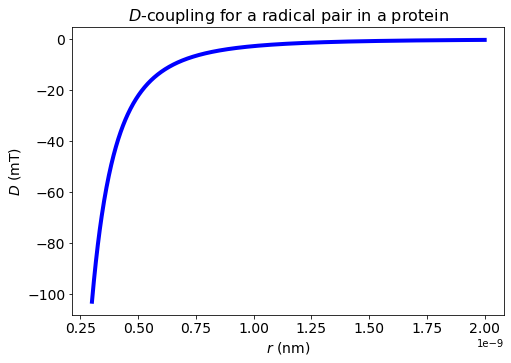

In [19]:
r = np.linspace(0.3e-9,2e-9,1000)
D = rp.estimations.dipolar_interaction_isotropic(r)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(r, D, color='blue', linewidth=4)
ax.set_title("$D$-coupling for a radical pair in a protein", size=16)
ax.set_xlabel('$r$ (nm)', size=14)
ax.set_ylabel('$D$ (mT)', size=14)
plt.tick_params(labelsize=14)

The Hamiltonian for dipolar coupling in a radical pair is given by,

$$
\hat{H}_D = \frac{2}{3} D \bigg(3 \hat{S}_{Az} \bullet \hat{S}_{Bz} - \hat{S}_{A} \bullet \hat{S}_{B}\bigg)
$$



In [20]:
electron1 = rp.simulation.Molecule.fromisotopes(isotopes=["E"], hfcs=[], name="electron1") 
electron2 = rp.simulation.Molecule.fromisotopes(isotopes=["E"], hfcs=[], name="electron2") 
radical_pair = rp.simulation.HilbertSimulation(molecules=[electron1, electron2], basis="Zeeman")

def radicalpair_zeeman_dipolar(Bmax, D):
    Bs = np.linspace(0, Bmax, 100)
    shape = len(radical_pair.zeeman_hamiltonian(0))
    E = np.zeros([len(Bs), shape], dtype=np.complex128)
    
    for i,B0 in enumerate(Bs):
        H = radical_pair.zeeman_hamiltonian(B0) + radical_pair.dipolar_hamiltonian(D)
        eigval = np.linalg.eigh(H)
        E[i] = eigval[0]  # 0 = eigenvalues, 1 = eigenvectors
        
    fig = plt.figure(1)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.plot(Bs, np.real(E), linewidth=4)
    ax.set_xlabel("B$_0$ / mT", size=14)
    ax.set_ylabel("Spin state energy", size=14)
    plt.tick_params(labelsize=14)
    plt.ylim(-4e9, 4e9)

@wdg.interact(Bmax = wdg.SelectionSlider(options=[("%g"%i,i) for i in np.linspace(0.0, 10, 101)], value=0.0),
              D = wdg.FloatSlider(min=-20, max=0, step=1, value=0.0))
def update(Bmax = 0.0, D = 0.0):radicalpair_zeeman_dipolar(Bmax, D)

interactive(children=(SelectionSlider(description='Bmax', options=(('0', np.float64(0.0)), ('0.1', np.float64(…

We can now add the the dipolar spin Hamiltonian to the other Hamiltonians to paint a complete picture of the [coherent](https://en.wikipedia.org/wiki/Coherence_(physics)) processes for a radical pair.

In [22]:
def radicalpair_total(Bmax, hfc1, hfc2, J, D):
    electron1 = rp.simulation.Molecule.fromisotopes(isotopes=["E"], hfcs=[hfc1], name="electron1") 
    electron2 = rp.simulation.Molecule.fromisotopes(isotopes=["E"], hfcs=[hfc2], name="electron2") 
    radical_pair = rp.simulation.HilbertSimulation(molecules=[electron1, electron2], basis="Zeeman")

    Bs = np.linspace(0, Bmax, 100)
    shape = len(radical_pair.zeeman_hamiltonian(0))
    E = np.zeros([len(Bs), shape], dtype=np.complex128)
    
    for i,B0 in enumerate(Bs):
        H = radical_pair.total_hamiltonian(B0, J, D)
        eigval = np.linalg.eigh(H)
        E[i] = eigval[0]  # 0 = eigenvalues, 1 = eigenvectors
        
    fig = plt.figure(1)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.plot(Bs, np.real(E), linewidth=4)
    ax.set_xlabel("B$_0$ / mT", size=14)
    ax.set_ylabel("Spin state energy", size=14)
    plt.tick_params(labelsize=14)
    plt.ylim(-4e9, 4e9)

@wdg.interact(Bmax = wdg.SelectionSlider(options=[("%g"%i,i) for i in np.linspace(0.0, 10, 100)]),
              hfc1 = wdg.FloatSlider(min=0, max=2.0, step=0.1, value=0.0),
              hfc2 = wdg.FloatSlider(min=0, max=2.0, step=0.1, value=0.0),
              J = wdg.FloatSlider(min=-20, max=20, step=1, value=0.0),
              D = wdg.FloatSlider(min=-20, max=0, step=1, value=0.0))
def update(Bmax = 0, hfc1 = 0.0, hfc2 = 0.0, J = 0.0, D = 0.0):radicalpair_total(Bmax, hfc1, hfc2, J, D)

interactive(children=(SelectionSlider(description='Bmax', options=(('0', np.float64(0.0)), ('0.10101', np.floa…